# Exercise 1
I denne øvelse skal I eksperimentere med Principal Component Analysis (PCA) til dimensionsreduktion og visualisering. I skal arbejde med datasættet ”Handwritten digits” fra Scikit Learn, som er scannede billeder af håndskrevne tal imellem 0 og 9 (dvs. 10 kategorier).

## Task 1
Indlæs data og lav kort data-analyse, fx. plot nogle eksempel billeder

In [2]:
# Defining methods and importing modules
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.datasets import load_digits
from sklearn import metrics
from sklearn.cluster import KMeans


In [3]:
X, y = load_digits(return_X_y=True)

In [4]:
nDigits = len(np.unique(y))

labels = y

data = scale(X)
nSamples, nFeatures = data.shape

print("n_digits: %d \t n_samples %d \t n_features %d"
      % (nDigits, nSamples, nFeatures))

sampleSize = 300

n_digits: 10 	 n_samples 1797 	 n_features 64


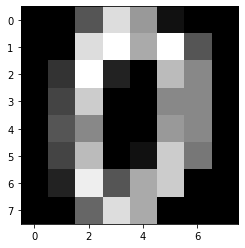

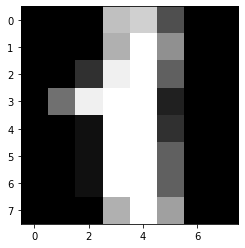

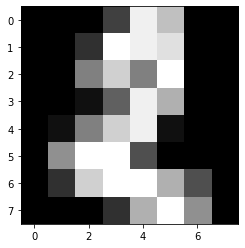

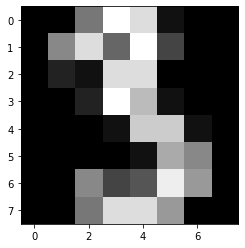

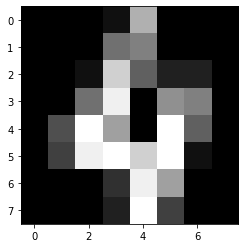

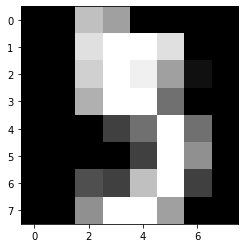

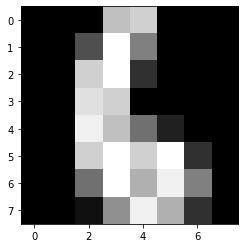

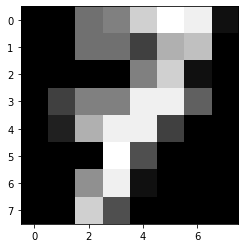

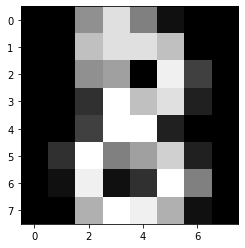

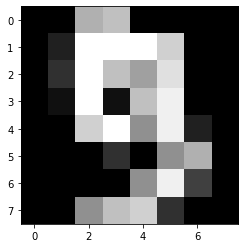

In [5]:
# Plot the digits:
plt.figure(0)
plt.imshow(np.array(X[0]).reshape(8,8), cmap='gray')
plt.figure(1)
plt.imshow(np.array(X[1]).reshape(8,8), cmap='gray')
plt.figure(2)
plt.imshow(np.array(X[2]).reshape(8,8), cmap='gray')
plt.figure(3)
plt.imshow(np.array(X[3]).reshape(8,8), cmap='gray')
plt.figure(4)
plt.imshow(np.array(X[4]).reshape(8,8), cmap='gray')
plt.figure(5)
plt.imshow(np.array(X[5]).reshape(8,8), cmap='gray')
plt.figure(6)
plt.imshow(np.array(X[6]).reshape(8,8), cmap='gray')
plt.figure(7)
plt.imshow(np.array(X[7]).reshape(8,8), cmap='gray')
plt.figure(8)
plt.imshow(np.array(X[8]).reshape(8,8), cmap='gray')
plt.figure(9)
plt.imshow(np.array(X[9]).reshape(8,8), cmap='gray')

## Task 2
Plot de forskellige tal/digits i 2D efter PCA dimensionsreduktion.

In [6]:

pca = PCA(n_components=2)
data2Dim = pca.fit(data.T)

# principale akser
data2DimComponents = pca.components_

# varianser og standard afvigelser (længde af akser)
varians = pca.explained_variance_
standardDeviation = np.sqrt(varians)

# Udtrukket middelværdi
mean = pca.mean_

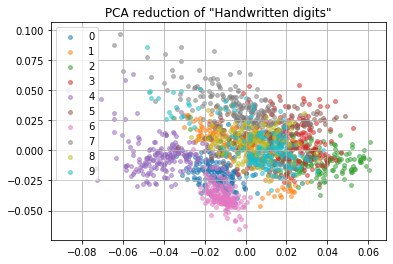

In [7]:
fig, plot = plt.subplots()
for number in range(10):
    numArr = np.where(labels == number)
    x = data2DimComponents[0,numArr[0]]
    y = data2DimComponents[1,numArr[0]]
    plot.scatter(x, y, s=15, label=number,
               alpha=0.5)

plot.legend()
plot.set_title('PCA reduction of "Handwritten digits"')
plot.grid(True)

plt.show()

# Exercise 2
I denne øvelse skal I benytte PCA til kompression/dekompression af data. I skal først benytte eksemplet nedenfor til at komprimere (transformere) data ned til en lavere dimension og dernæst rekonstruere billedet igen.

## Task 1
Plot varianserne (explained_variance_ i PCA objekt – med n_components til max.) – relater til valg af komponenter.

In [8]:
pca = PCA(n_components=2)
data2Dim = pca.fit(data.T)
explainedVariance2Dim = data2Dim.explained_variance_
print(explainedVariance2Dim)

pca = PCA(n_components=8)
data8Dim = pca.fit(data.T)
explainedVariance8Dim = data8Dim.explained_variance_
print(explainedVariance8Dim)

pca = PCA(n_components=16)
data16Dim = pca.fit(data.T)
explainedVariance16Dim = data16Dim.explained_variance_
print(explainedVariance16Dim)

[209.3824782  166.35065515]
[209.3824739  166.35065293 146.69340055 112.09522302  84.01107051
  69.39570816  68.53437375  58.32557311]
[209.38247819 166.35065589 146.69351004 112.09550301  84.01150237
  69.39706045  68.54202     58.35218898  51.36411337  50.12366114
  48.12935162  44.80650943  38.90629573  38.22721287  36.3018234
  31.45677457]


## Task 2
Rekonstruér nogle tal og sammenlign med de originale – ligner de ?

Samples: 16
Features: 64


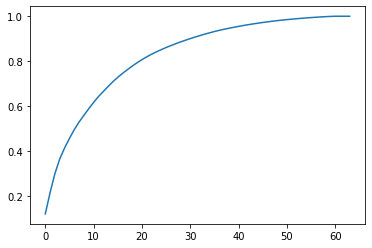

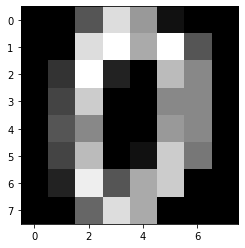

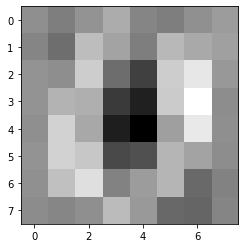

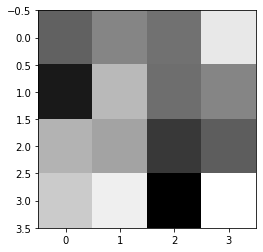

In [36]:
pca = PCA()
pca.fit(data)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(0)
plt.plot(range(len(data[0])),cumsum)

plt.figure(1)
plt.imshow(np.array(X[0]).reshape(8,8), cmap='gray')

n_samples, h = data.shape

pca = PCA(n_components=16)
data8Dim = pca.fit_transform(data.T)
recovered_data = pca.inverse_transform(data8Dim);

test =  pca.components_.reshape(n_samples,16)

nSamples, nFeatures = data8Dim.T.shape

print("Samples: " + str(nSamples))
print("Features: " + str(nFeatures))
plt.figure(2)
plt.imshow(np.array(recovered_data.T[0]).reshape(8,8), cmap='gray')

plt.figure(3)
plt.imshow(test[0].reshape(4,4), cmap='gray')


## Task 3
Hvor meget data fylder jeres billeder før og efter kompressionen ?

In [22]:
print("Size of original data: " + str(len(bytearray(data))));
print("Size if compressed data: " + str(len(bytearray(data8Dim))));

Size of original data: 920064
Size if compressed data: 10240


## Task 4
Plot også middelværdi-billedet (dvs. rekonstruér udfra middelværdien).